# Python Control 練習
次のセルを実行して、python-controlをインストールします。

セルの実行は左の▷を押すか、セルを選択してshift+enterです・

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 3.9 MB/s eta 0:00:00


In [2]:
#必要なモジュールを読み込む
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#伝達関数オブジェクトを作成
sys=ctrl.tf( [110],  [0.01, 1 , 0] )
print(sys)


<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      110
  ------------
  0.01 s^2 + s


In [4]:
#システムの安定余裕を調べる
gm, pm, gcw, pcw = ctrl.margin(sys)
print("ゲイン余裕:", gm)
print("位相余裕:", pm)
print("位相交差周波数:", gcw)
print("ゲイン交差周波数:", pcw)


ゲイン余裕: inf
位相余裕: 49.915754968644166
位相交差周波数: nan
ゲイン交差周波数: 84.16083396446696


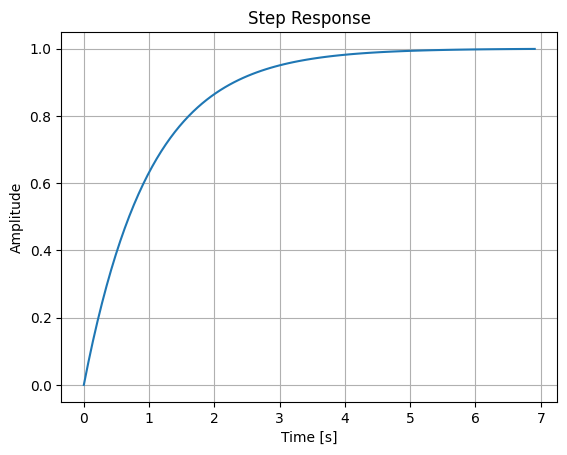

In [5]:
#ステップ応答を計算
sys = ctrl.tf([1], [1, 1])
t, y = ctrl.step_response(sys)
plt.figure()
plt.plot(t, y)
plt.title("Step Response")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


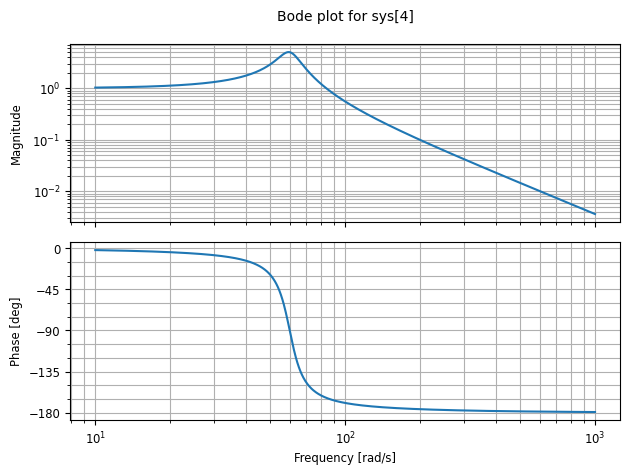

In [6]:
#ボード線図を描く

sys = ctrl.tf([60**2], [1, 2*0.1*60, 60**2])
ctrl.bode(sys)

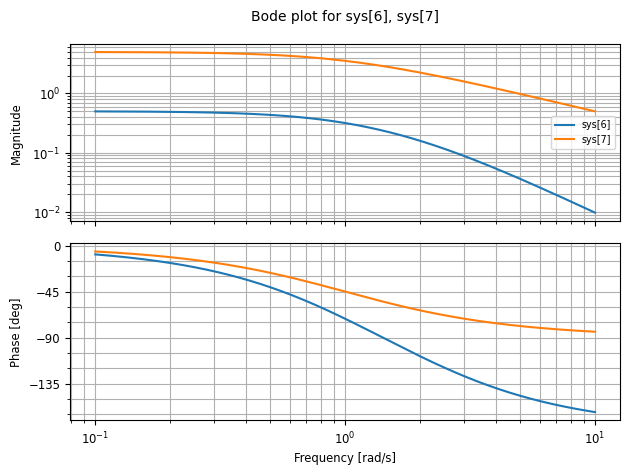

In [7]:
#複数のボード線図を重ねる
sys1 = ctrl.tf([1], [1, 3, 2])
sys2 = ctrl.tf([5], [1, 1])
ctrl.bode([sys1, sys2])

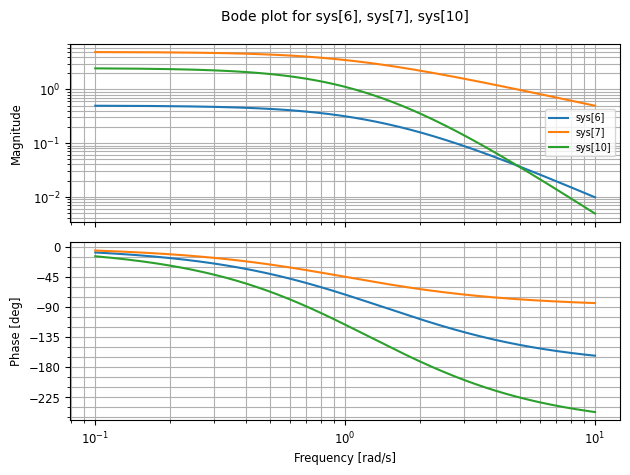

In [8]:
# 複数のシステムの直列接続
newsys = sys1*sys2
ctrl.bode([sys1, sys2, newsys])

# ループ成形チャレンジ

## StampFlyの伝達関数を生成

In [9]:
#必要なモジュールを読み込む
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

#StampFlyのマル秘パラメータ
roll_gain= 219.4161359941975
pitch_gain= 151.11667712081575
yaw_gain= 29.43538617407769
time_constant_stampfly = 0.011727677322467796

#Roll, Pitch, Yawの伝達関数を生成
sys_roll = ctrl.tf( [roll_gain],  [time_constant_stampfly, 1 , 0] )
sys_pitch = ctrl.tf( [pitch_gain],  [time_constant_stampfly, 1 , 0] )
sys_yaw = ctrl.tf( [yaw_gain],  [time_constant_stampfly, 1 , 0] )

#表示
print("Rollの伝達関数")
print(sys_roll)
print("Pitchの伝達関数")
print(sys_pitch)
print("Yawの伝達関数")
print(sys_yaw)

Rollの伝達関数
<TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       219.4
  ---------------
  0.01173 s^2 + s
Pitchの伝達関数
<TransferFunction>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       151.1
  ---------------
  0.01173 s^2 + s
Yawの伝達関数
<TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       29.44
  ---------------
  0.01173 s^2 + s


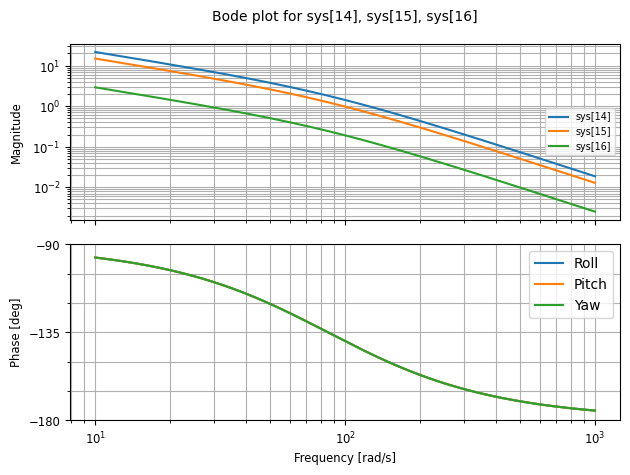

In [10]:
# Bode線図を描く

ctrl.bode([sys_roll, sys_pitch, sys_yaw])
plt.legend(["Roll", "Pitch", "Yaw"])
plt.show()


In [11]:
# 位相余裕とゲイン交差周波数を求める

for sys, name in zip([sys_roll, sys_pitch, sys_yaw],["Roll", "Pitch", "Yaw"]):
    gm, pm, wg, wp = ctrl.margin(sys)
    print(f"{name} - 位相余裕: {pm:.2f} deg")
    print(f"{name} - ゲイン交差周波数: {wp:.2f} rad/s")

Roll - 位相余裕: 34.47 deg
Roll - ゲイン交差周波数: 124.19 rad/s
Pitch - 位相余裕: 40.81 deg
Pitch - ゲイン交差周波数: 98.76 rad/s
Yaw - 位相余裕: 71.84 deg
Yaw - ゲイン交差周波数: 27.97 rad/s


## 比例制御器の設計

Roll - 位相余裕: 34.47 deg
Roll - ゲイン交差周波数: 124.19 rad/s
Pitch - 位相余裕: 40.81 deg
Pitch - ゲイン交差周波数: 98.76 rad/s
Yaw - 位相余裕: 71.84 deg
Yaw - ゲイン交差周波数: 27.97 rad/s


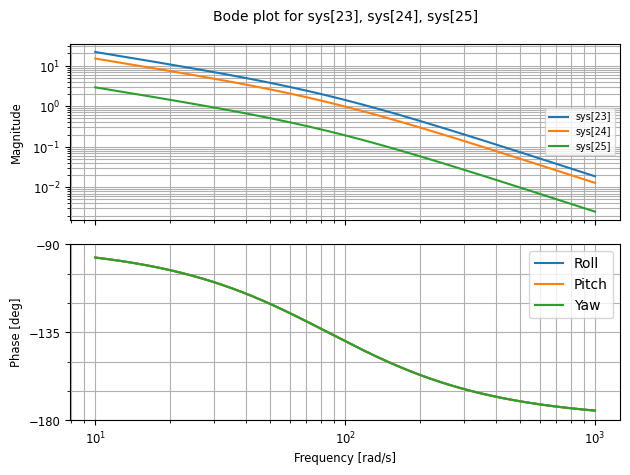

In [12]:
# 比例制御の設計
# 以下のゲインを変更して臨む位相余裕になるように試行錯誤してください
Kp_roll = 1.0
Kp_pitch = 1.0
Kp_yaw = 1.0

# 比例制御器の伝達関数
sys_roll_p = ctrl.tf([Kp_roll], [0, 1])
sys_pitch_p = ctrl.tf([Kp_pitch], [0, 1])
sys_yaw_p = ctrl.tf([Kp_yaw], [0, 1])

# 制御系の伝達関数
sys_roll_openloop = sys_roll_p*sys_roll
sys_pitch_openloop = sys_pitch_p*sys_pitch
sys_yaw_openloop = sys_yaw_p*sys_yaw

# 余裕を表示
for sys, name in zip([sys_roll_openloop, sys_pitch_openloop, sys_yaw_openloop],["Roll", "Pitch", "Yaw"]):
    gm, pm, wg, wp = ctrl.margin(sys)
    print(f"{name} - 位相余裕: {pm:.2f} deg")
    print(f"{name} - ゲイン交差周波数: {wp:.2f} rad/s")

# Bode線図を描く
ctrl.bode([sys_roll_openloop, sys_pitch_openloop, sys_yaw_openloop])
plt.legend(["Roll", "Pitch", "Yaw"])
plt.show()

## PID制御器の設計

Roll - 位相余裕: 53.72 deg
Roll - ゲイン交差周波数: 187.91 rad/s
Pitch - 位相余裕: 53.65 deg
Pitch - ゲイン交差周波数: 182.72 rad/s
Yaw - 位相余裕: 55.73 deg
Yaw - ゲイン交差周波数: 92.28 rad/s


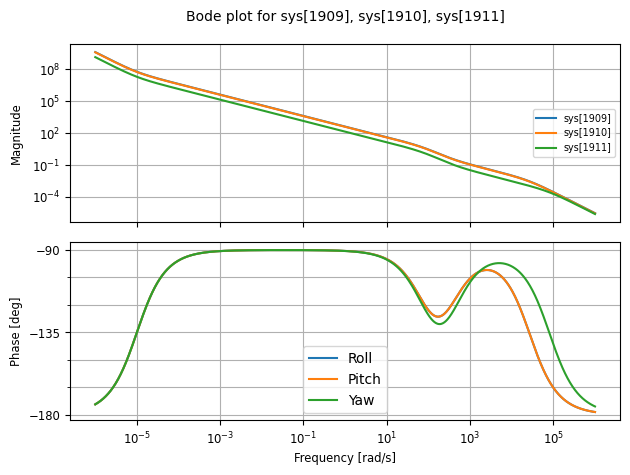

In [53]:
# PID制御器の設計
# 以下のゲインを変更して臨む位相余裕になるように試行錯誤してください
Kp_roll = 1.8
Ti_roll = 100000
Td_roll = 0.003
eta_roll = 0.0125

Kp_pitch = 2.5
Ti_pitch = 100000
Td_pitch = 0.003
eta_pitch = 0.0125

Kp_yaw = 4.5
Ti_yaw = 100000
Td_yaw = 0.0025
eta_yaw = 0.005

# 不完全微分を含むPID制御器の伝達関数
sys_roll_i = ctrl.tf([1], [Ti_roll, 0])
sys_roll_d = ctrl.tf([Td_roll, 0], [eta_roll*Td_roll, 1])
sys_roll_pid = Kp_roll * (1 + sys_roll_i + sys_roll_d)

sys_pitch_i = ctrl.tf([1], [Ti_pitch, 0])
sys_pitch_d = ctrl.tf([Td_pitch, 0], [eta_pitch*Td_pitch, 1])
sys_pitch_pid = Kp_pitch * (1 + sys_pitch_i + sys_pitch_d)

sys_yaw_i = ctrl.tf([1], [Ti_yaw, 0])
sys_yaw_d = ctrl.tf([Td_yaw, 0], [eta_yaw*Td_yaw, 1])
sys_yaw_pid = Kp_yaw * (1 + sys_yaw_i + sys_yaw_d)

sys_roll_pid = Kp_roll * (1 + sys_roll_i + sys_roll_d)

sys_pitch_i = ctrl.tf([1], [Ti_pitch, 0])
sys_pitch_d = ctrl.tf([Td_pitch, 0], [eta_pitch*Td_pitch, 1])
sys_pitch_pid = Kp_pitch * (1 + sys_pitch_i + sys_pitch_d)

sys_yaw_i = ctrl.tf([1], [Ti_yaw, 0])
sys_yaw_d = ctrl.tf([Td_yaw, 0], [eta_yaw*Td_yaw, 1])
sys_yaw_pid = Kp_yaw * (1 + sys_yaw_i + sys_yaw_d)


# 制御系の伝達関数
sys_roll_openloop = sys_roll_pid*sys_roll
sys_pitch_openloop = sys_pitch_pid*sys_pitch
sys_yaw_openloop = sys_yaw_pid*sys_yaw

# 余裕を表示
for sys, name in zip([sys_roll_openloop, sys_pitch_openloop, sys_yaw_openloop],["Roll", "Pitch", "Yaw"]):
    gm, pm, wg, wp = ctrl.margin(sys)
    print(f"{name} - 位相余裕: {pm:.2f} deg")
    print(f"{name} - ゲイン交差周波数: {wp:.2f} rad/s")

# Bode線図を描く
ctrl.bode([sys_roll_openloop, sys_pitch_openloop, sys_yaw_openloop])
plt.legend(["Roll", "Pitch", "Yaw"])
plt.show()